Deberán realizar 5 visualizaciones interesantes que ayuden a explicar el target haciendo almenos un plot de cada uno de los siguientes tipos:

* Bar plot (o stacked bar plot o variaciones)
* Violin plot
* Box plot
* Heatmap

In [ ]:
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Organizacion de Datos/Colab Notebooks/TP2/secondary_data.csv", sep=';')

# Analisis exploratorio

Tenemos en total 20 features (sin contar el target), de las cuales 17 son features categoricas.

In [4]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

A continuacion vemos que tenemos NaNs en las siguientes columnas: cap-surface, gill-attachment, gill-spacing, stem-root, stem-surface, veil-type, veil-color, ring-type, spore-print-color.

¿Que features tienen menos del 25% de valores no nulos?: stem-root (15% no nulos), veil-type (5%), veil-color(12%), spore-print-color (10%).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Comprobamos que efectivamente hay columnas que tienen valores NaN.

In [7]:
df["cap-surface"].isna().any(), df["gill-attachment"].isna().any(), df["gill-spacing"].isna().any(), df["stem-root"].isna().any(), df["stem-surface"].isna().any(), \
df["veil-type"].isna().any(), df["veil-color"].isna().any(), df["ring-type"].isna().any(), df["spore-print-color"].isna().any()

(True, True, True, True, True, True, True, True, True)

Vemos que las features cap-diameter, stem-height y stem-width son numericas. 

Vemos tambien que tienen muchos valores distintos.

In [8]:
df["cap-diameter"].nunique()

2571

In [9]:
df["stem-height"].nunique()

2226

In [10]:
df["stem-width"].nunique()

4630

# Visualizaciones

## Bar plot

Text(0, 0.5, 'Frecuencia')

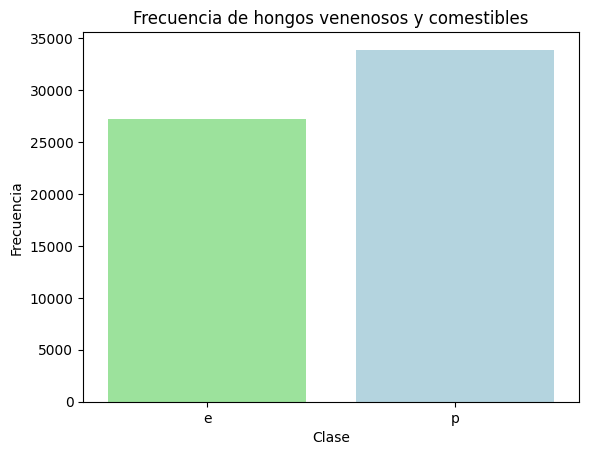

In [26]:
bar = df.groupby(['class']).agg({"class": "count"})
bar.columns = ["frecuencia"]
bar.reset_index(inplace=True)

sns.barplot(data=bar, x='class', y='frecuencia', palette=["lightgreen", "lightblue"])

plt.title('Frecuencia de hongos venenosos y comestibles')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

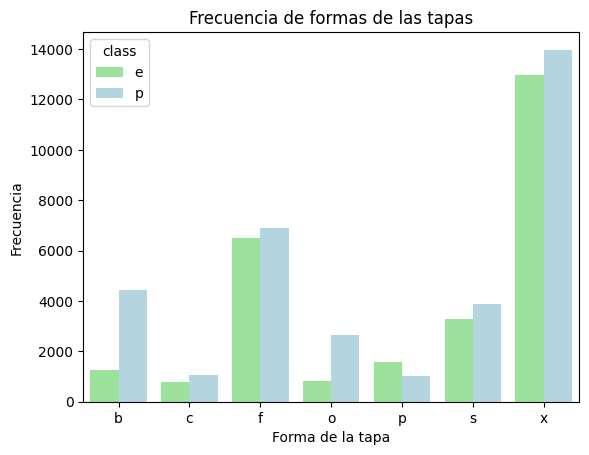

In [27]:
bar = df.groupby(['cap-shape', 'class']).agg({"class": "count"})
bar.columns = ["frecuencia"]
bar.reset_index(inplace=True)

sns.barplot(data=bar, x='cap-shape', y='frecuencia', hue='class', palette=["lightgreen", "lightblue"])

plt.title('Frecuencia de formas de las tapas')
plt.xlabel('Forma de la tapa')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

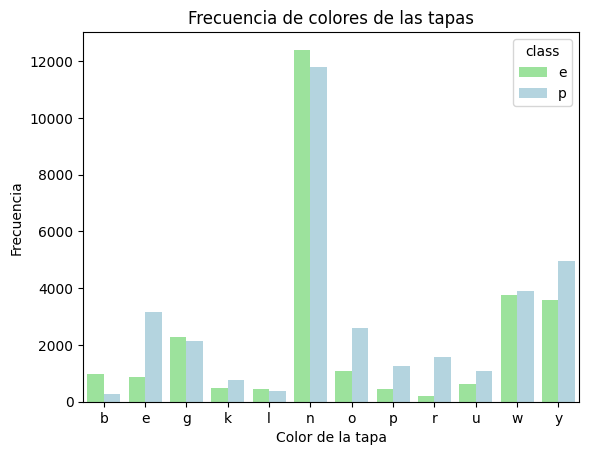

In [28]:
bar = df.groupby(['cap-color', 'class']).agg({"class": "count"})
bar.columns = ["frecuencia"]
bar.reset_index(inplace=True)

sns.barplot(data=bar, x='cap-color', y='frecuencia', hue='class', palette=["lightgreen", "lightblue"])

plt.title('Frecuencia de colores de las tapas')
plt.xlabel('Color de la tapa')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

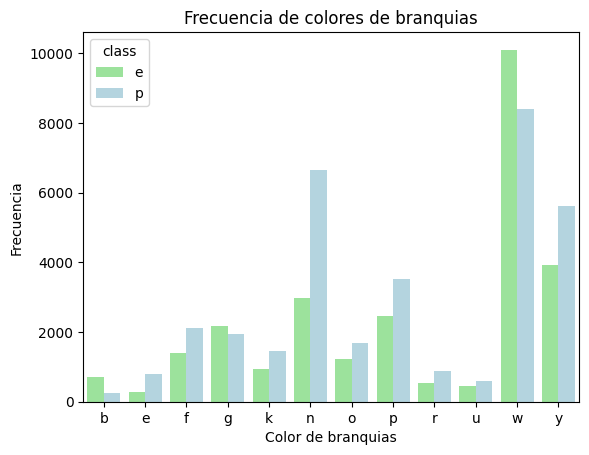

In [29]:
bar = df.groupby(['gill-color', 'class']).agg({"class": "count"})
bar.columns = ["frecuencia"]
bar.reset_index(inplace=True)

sns.barplot(data=bar, x='gill-color', y='frecuencia', hue='class', palette=["lightgreen", "lightblue"])

plt.title('Frecuencia de colores de branquias')
plt.xlabel('Color de branquias')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

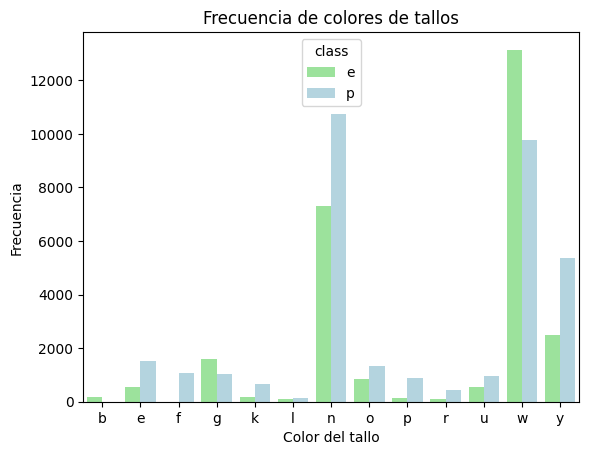

In [30]:
bar = df.groupby(['stem-color', 'class']).agg({"class": "count"})
bar.columns = ["frecuencia"]
bar.reset_index(inplace=True)

sns.barplot(data=bar, x='stem-color', y='frecuencia', hue='class', palette=["lightgreen", "lightblue"])

plt.title('Frecuencia de colores de tallos')
plt.xlabel('Color del tallo')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

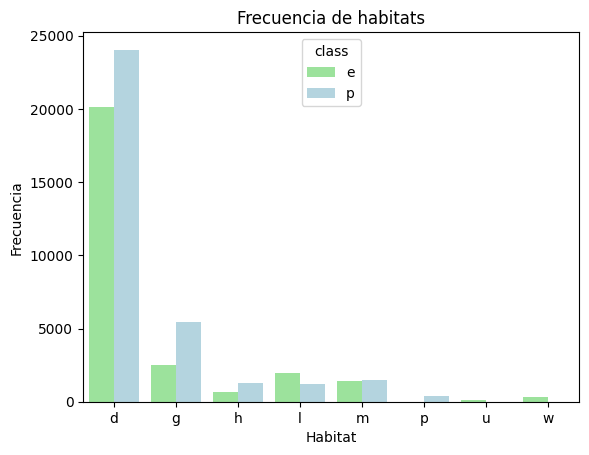

In [31]:
bar = df.groupby(['habitat', 'class']).agg({"class": "count"})
bar.columns = ["frecuencia"]
bar.reset_index(inplace=True)

sns.barplot(data=bar, x='habitat', y='frecuencia', hue='class', palette=["lightgreen", "lightblue"])

plt.title('Frecuencia de habitats')
plt.xlabel('Habitat')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

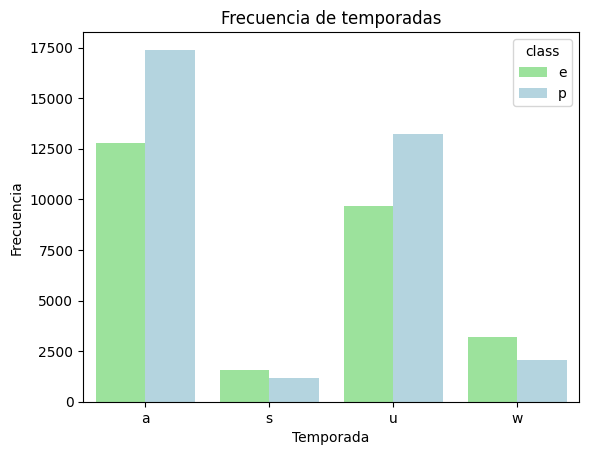

In [32]:
bar = df.groupby(['season', 'class']).agg({"class": "count"})
bar.columns = ["frecuencia"]
bar.reset_index(inplace=True)

sns.barplot(data=bar, x='season', y='frecuencia', hue='class', palette=["lightgreen", "lightblue"])

plt.title('Frecuencia de temporadas')
plt.xlabel('Temporada')
plt.ylabel('Frecuencia')

## Violin plot

Text(0, 0.5, 'Clase')

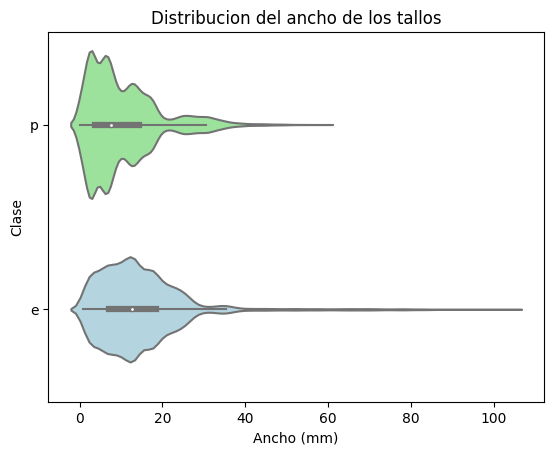

In [18]:
sns.violinplot(data=df, x='stem-width', y='class', palette=["lightgreen", "lightblue"])
plt.title('Distribucion del ancho de los tallos')
plt.xlabel('Ancho (mm)')
plt.ylabel('Clase')

## Box plot

Text(0, 0.5, 'Clase')

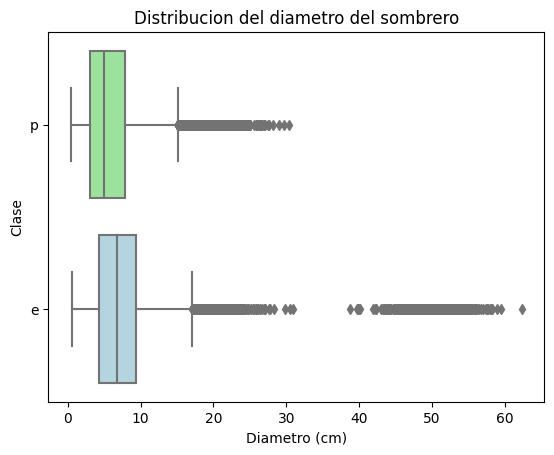

In [19]:
sns.boxplot(data=df, x='cap-diameter', y='class', palette=["lightgreen", "lightblue"])
plt.title('Distribucion del diametro del sombrero')
plt.xlabel('Diametro (cm)')
plt.ylabel('Clase')

## Heatmap

Text(0.5, 1.0, 'Matriz de correlación')

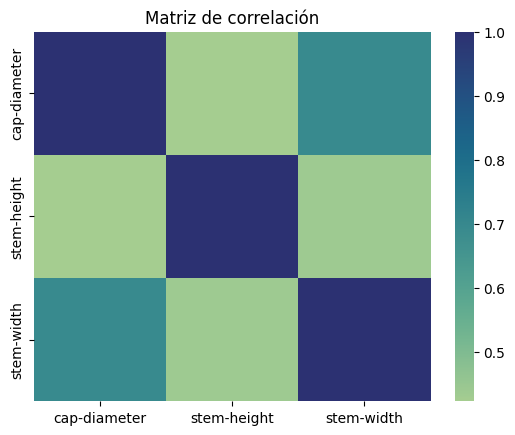

In [20]:
sns.heatmap(data=df[["cap-diameter", "stem-height", "stem-width"]].corr(), cmap="crest")
plt.title('Matriz de correlación')

En la siguiente visualizacion buscamos ver la frecuencia de diferentes combinaciones para colores de tapa (cap-color) y colores de branquias (gill-color).

Text(50.722222222222214, 0.5, 'Color de branquias')

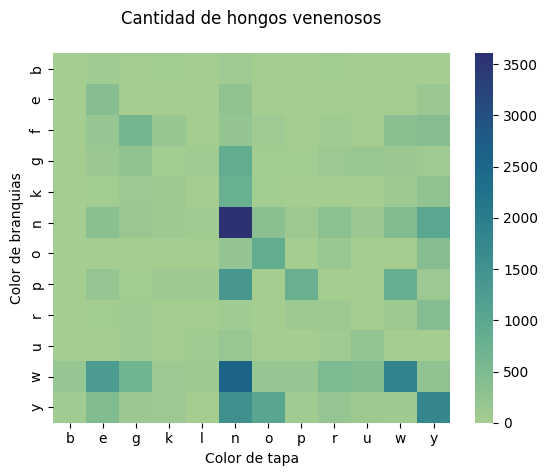

In [21]:
heatmap = df.copy()
heatmap["class"] = heatmap["class"].map(lambda x: 1 if x == "p" else 0)
heatmap = heatmap.pivot_table(index="gill-color", columns="cap-color", values="class", fill_value=0, aggfunc="sum")

sns.heatmap(data=heatmap, cmap="crest")
plt.title('Cantidad de hongos venenosos\n')
plt.xlabel('Color de tapa')
plt.ylabel('Color de branquias')

## Grafico de dispersion

La idea de hacer un grafico de dispersion es ver si hay una clara separación entre las clases en función de las características. Si las clases están completamente separadas en los gráficos de dispersión, es posible que Random Forest pueda lograr un AUC de 1. Lo mismo se aplica para XGBoost. 

La razon de esto se explica un poco mas en detalle en la parte IV.

En los siguientes dos Scatter Plot vemos una clara separación entre las clases en función de las características. 

Al tener clara separación entre las clases en función de las características, un arbol puede aprender facilmente que si un hongo tiene mas de 60 de ancho en el tallo o mas de 35 de diametro un hongo es comestible.

Text(0, 0.5, 'Ancho del tallo')

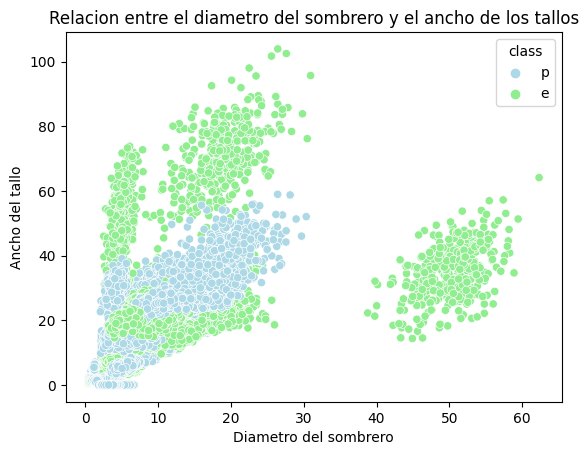

In [22]:
sns.scatterplot(data=df, x="cap-diameter", y="stem-width", hue="class", palette=["lightblue", "lightgreen"])
plt.title('Relacion entre el diametro del sombrero y el ancho de los tallos')
plt.xlabel('Diametro del sombrero')
plt.ylabel('Ancho del tallo')

Al tener clara separación entre las clases en función de las características, un arbol puede aprender facilmente que si un hongo tiene mas de 20 de alto en el tallo o mas de 35 de diametro en la tapa un hongo es comestible.

Text(0, 0.5, 'Altura del tallo')

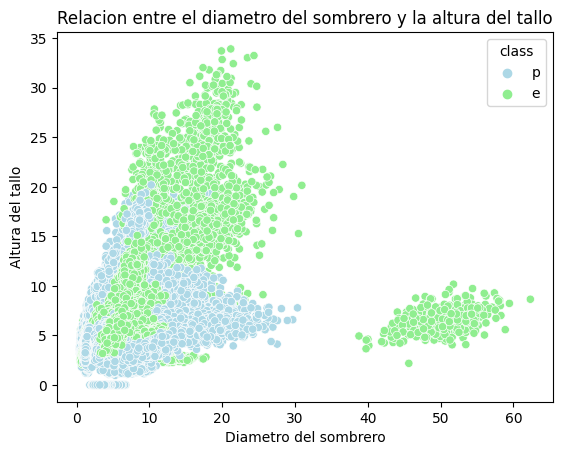

In [23]:
sns.scatterplot(data=df, x="cap-diameter", y="stem-height", hue="class", palette=["lightblue", "lightgreen"])
plt.title('Relacion entre el diametro del sombrero y la altura del tallo')
plt.xlabel('Diametro del sombrero')
plt.ylabel('Altura del tallo')

## Histograma

Text(0, 0.5, 'Clase')

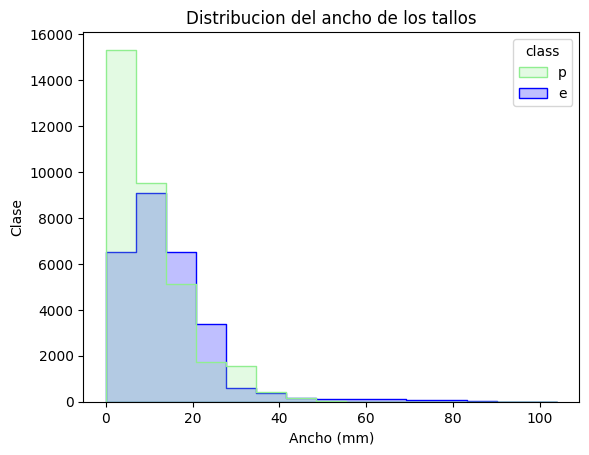

In [24]:
sns.histplot(data=df, x='stem-width', bins = 15, color="lightgreen", hue="class", element="step", palette=["lightgreen", "blue"])
plt.title('Distribucion del ancho de los tallos')
plt.xlabel('Ancho (mm)')
plt.ylabel('Clase')

Text(0, 0.5, 'Clase')

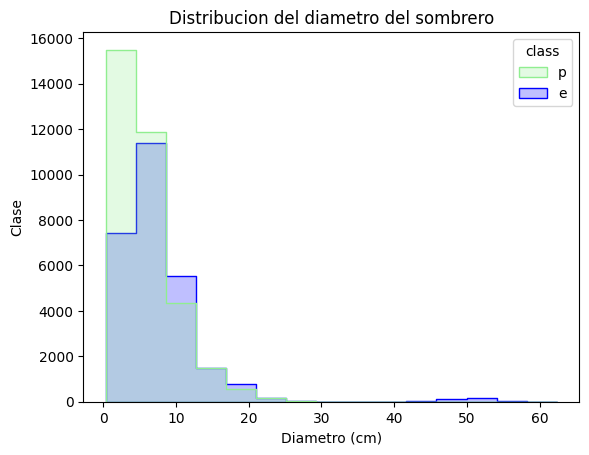

In [25]:
sns.histplot(data=df, x='cap-diameter', bins = 15, color="lightgreen", hue="class", element="step", palette=["lightgreen", "blue"])
plt.title('Distribucion del diametro del sombrero')
plt.xlabel('Diametro (cm)')
plt.ylabel('Clase')